<a href="https://colab.research.google.com/github/aniketmali-7/AdvertisingSalesRegression/blob/main/Copy_of_AdvertisingSalesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict sales revenue

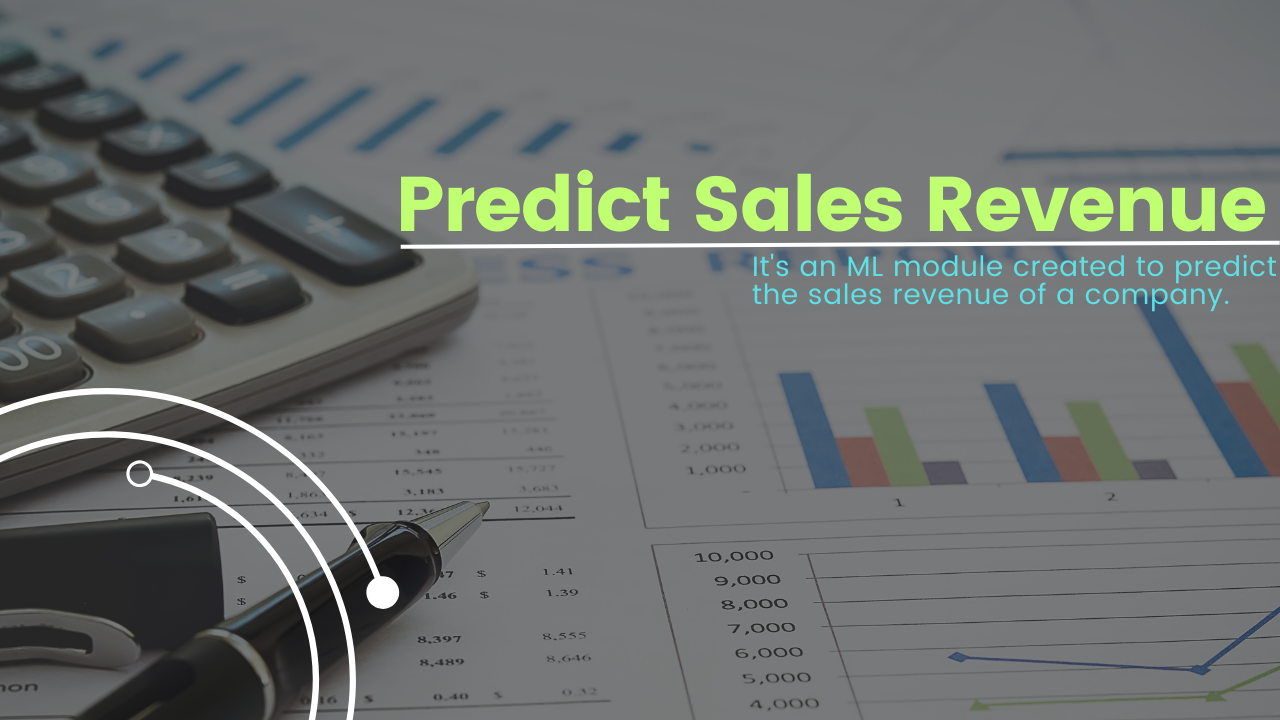

## **Feature Descriptions**
1. **TV** - Spend on TV Advertisements
2. **Radio** - Spend on radio Advertisements
3. **Newspaper** - Spend on newspaper Advertisements
4. **Sales** - Sales revenue generated



*   **Sales** is **dependent / targe**t variable
*  **TV**, **Radio** and **Newspaper** are **independent** variables





## Let's Start


In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Ignoring warning messages to improve code readability
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the advertising data from an online CSV file
data = pd.read_csv("https://raw.githubusercontent.com/aniketmali-7/AdvertisingSalesRegression/main/Advertising.csv?token=GHSAT0AAAAAACEEFIICPTM6P5BLBEBUYU2UZERHHPA")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#we dont need the frist column so we are removing it
data = data.drop(['Unnamed: 0'],axis=1)


In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdata = pd.DataFrame(pt.fit_transform(data))
powerdata.columns = data.columns

powerdata.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


<Axes: xlabel='Newspaper', ylabel='Density'>

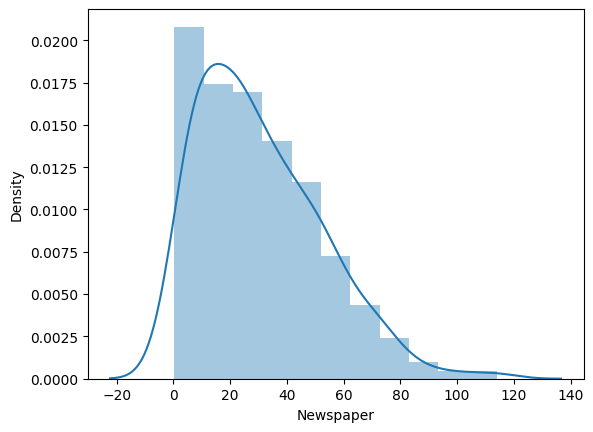

In [10]:

sns.distplot(data['Newspaper'],kde=True)

<Axes: xlabel='Newspaper', ylabel='Density'>

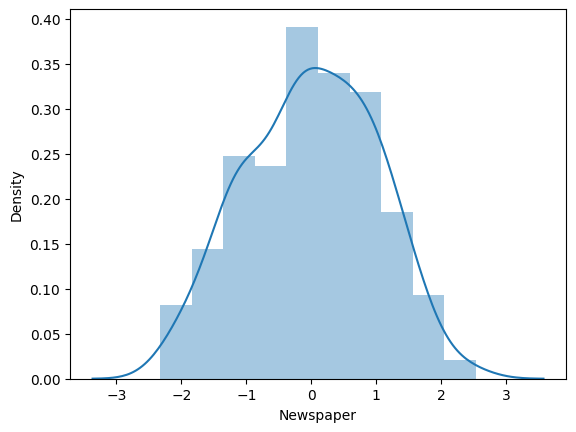

In [11]:
sns.distplot(powerdata['Newspaper'],kde=True)


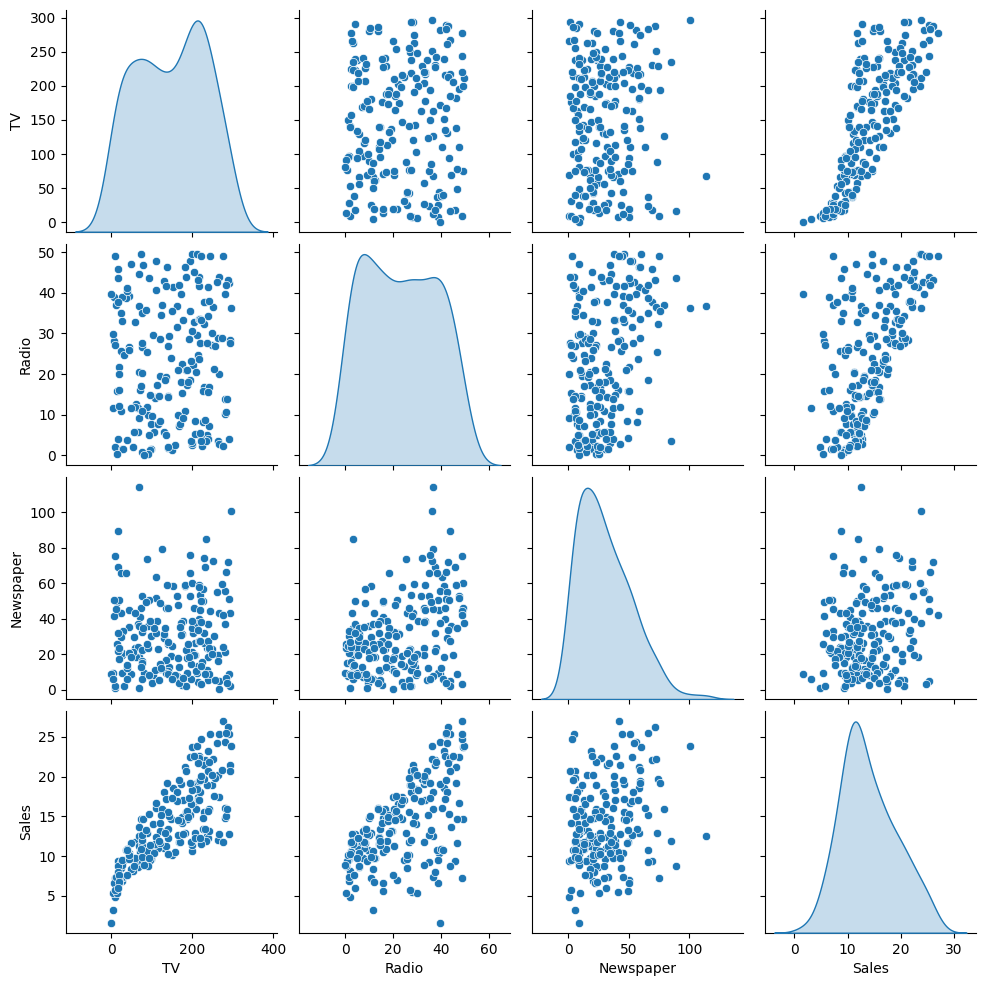

In [13]:
sns.pairplot(data, diag_kind='kde')






## **Based on analysis of the pairplot, it seems you have made the following observations:**

* **Strong Positive Relationship between TV and Sales:** The scatter plot between TV advertising and sales shows a strong positive relationship. As the amount spent on TV advertising increases, there is a corresponding increase in sales. This suggests that TV advertising has a significant impact on sales, and higher TV ad expenditures tend to result in higher sales revenue.

* **Weak Positive Relationship between Radio and Sales**: The scatter plot between radio advertising and sales indicates a weak positive relationship. While there is a slight upward trend, it is not as pronounced as the relationship between TV advertising and sales. This suggests that radio advertising may have a smaller but still positive impact on sales.

* **No Significant Relationship between Newspaper and Sales:** The scatter plot between newspaper advertising and sales does not show a clear pattern or trend. The points appear to be scattered randomly, indicating no significant relationship between newspaper advertising expenditures and sales. This suggests that increasing or decreasing spending on newspaper ads may not have a visible impact on sales.




In [15]:
#to be presize let's see coreletion between parameters

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

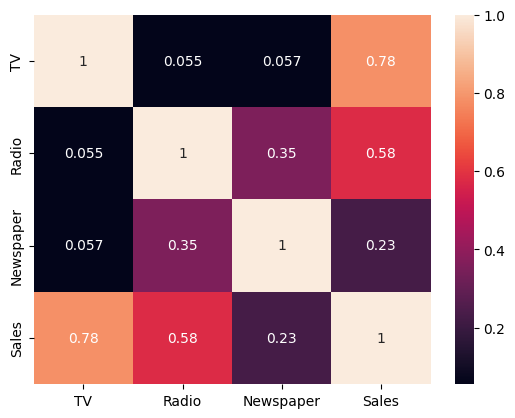

In [17]:
sns.heatmap(data.corr(),annot=True)

**Observation:**

* The diagonal of the correlation matrix represents the auto-correlation of the variables. In this case, the auto-correlation is always 1, indicating a perfect correlation between a variable and itself.

* Analyzing the correlation matrix, we observe that the correlation between TV and Sales is the highest, with a value of 0.78. This suggests a strong positive correlation, indicating that as the amount spent on TV advertising increases, the sales revenue tends to increase as well.

* Furthermore, the correlation between Sales and Radio is 0.576, indicating a positive correlation, although somewhat weaker compared to the TV and Sales correlation. This suggests that radio advertising also has a positive impact on sales, but to a lesser extent.



In [25]:
# Selecting the input features (TV and Radio) and the target variable (Sales)
x = data[['TV', 'Radio']]
y = data['Sales']

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# 80% of the data will be used for training, 20% for testing
# Setting random_state=10 ensures the same split is generated each time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
model2 = LinearRegression()

# Fitting the model on the training data
model2.fit(x_train, y_train)

# Printing the training R2 (coefficient of determination)
print("Training R2")
print(model2.score(x_train, y_train))

# Printing the testing R2 (coefficient of determination)
print("Testing R2")
print(model2.score(x_test, y_test))


Training R2
0.9208213397821704
Testing R2
0.8354496662944217


In [26]:
# Printing the coefficients of the model's features
print(model2.coef_)

# Printing the intercept or bias term of the model
print(model2.intercept_)


[0.04372065 0.19242472]
3.217026108512968
